# Проект: "Рынок заведений общественного питания Москвы"

1. [Описание](#description)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#eda)
    * [Исследование количества объектов по типам](#object_types)
    * [Соотношение сетевых и единичных объектов](#chain)
    * [Среднее число посадочных мест для заведения](#seats)
    * [Исследование местоположения](#street)
4. [Выводы](#conclusions)

<a id="description"></a>
## Описание 

Группа заказчиков запланировала открыть заведение общественного питания в формате кафе, в котором посетителей обслуживают роботы. Для финансирования проекта решено привлечь инвесторов. Необходимо подготовить исследование рынка общественного питания Москвы и составить презентацию для встречи с инвесторами.

**Целью** выполнения проекта по исследованию рынка заведений общественного питания Москвы является оценка влияния местоположения на подходящий формат заведения и посещаемость. По результатам анализа необходимо сформировать выводы и рекоммендации с оптимальными параметрами планируемого заведения для инвесторов в объект общественного питания. Результаты должны быть представлены в виде презентации.


Данные для выполнения работы предоставлены в виде файла в формате csv. Необходимо изучить датасет на предмет дубликатов, пропусков, ошибок.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<a id="preprocessing"></a>
## Предобработка данных

Сохраним таблицу и выведем 5 первых строк

In [2]:
rest_data = pd.read_csv('C://Users//1//Downloads//rest_data.csv')

In [3]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Получим информацию о датафрейме и типах данных в столбцах

In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропущенные значения отсутствуют, проведем проверку на дубликаты

In [5]:
rest_data.duplicated().sum()

0

Дубликаты в таблице отсутствуют.

Теперь изучим уникальные значения для столбцов.

In [6]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [7]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Ошибок в названиях не обнаружено.

In [8]:
rest_data['number'].value_counts().sort_values(ascending=False).head(25)

0      1621
40      835
20      727
30      685
10      644
50      560
60      472
80      464
15      360
45      360
100     343
25      309
120     301
48      293
70      272
12      270
35      262
240     260
90      254
4       231
200     219
6       218
8       204
150     197
2       196
Name: number, dtype: int64

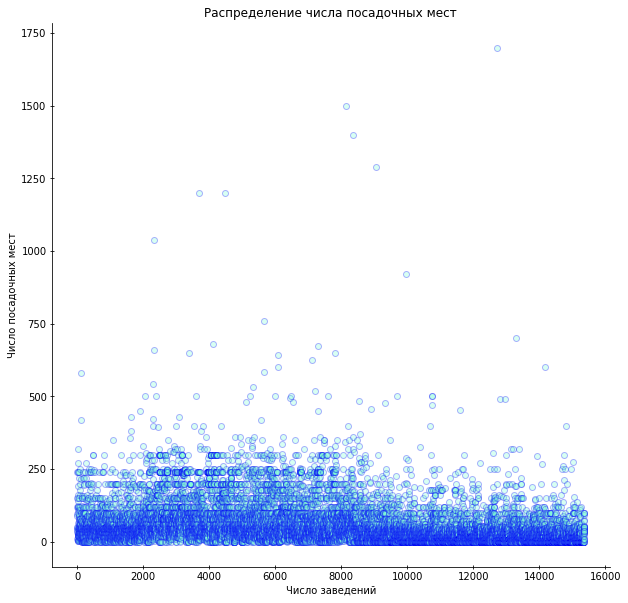

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(rest_data['number'].index,rest_data['number'], ec = 'blue', color = 'aquamarine', alpha = 0.3)
plt.title('Распределение числа посадочных мест')
plt.xlabel('Число заведений')
plt.ylabel('Число посадочных мест')
plt.tick_params(direction='inout')
sns.despine()
plt.show()

 
Отрицательные значения в количестве посадочных мест отсутствуют. 

Минимальное значение - 0, встречается довольно часто, т.к. большое количество заведений общественного питания работают "на вынос". 

Максимальное значение - 1700. После поиска в интернете обнаружилось, что и такое количество посадочных мест в Москве возможно.

Основной диапазон 0-100 посадочных мест корректен

<a id="eda"></a>
## Исследовательский анализ данных

<a id="object_types"></a>
### Cоотношение видов объектов общественного питания по количеству

Построим столбчатую диаграмму с использованием модуля **pyplot**

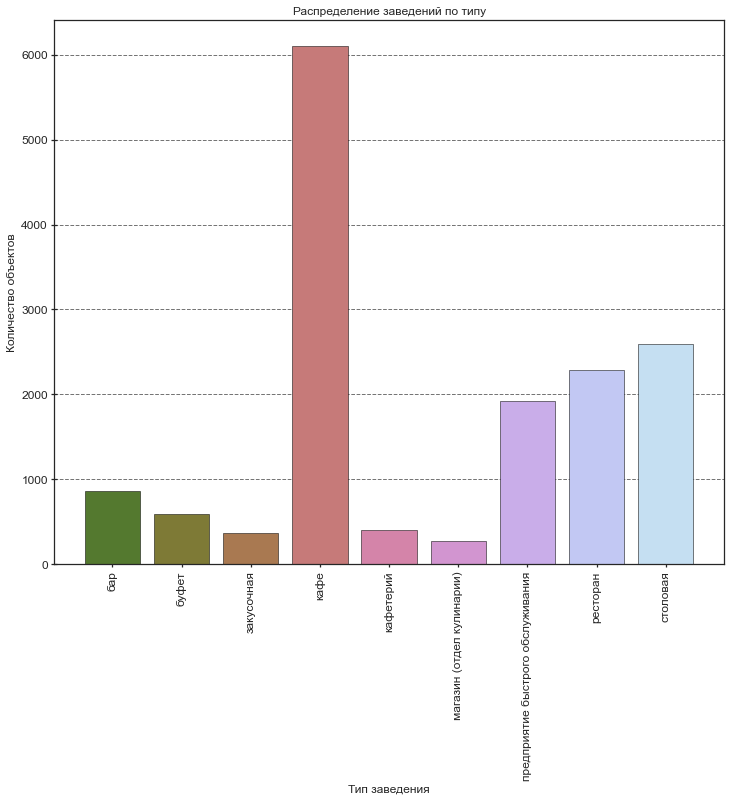

In [69]:
object_types = rest_data.groupby('object_type').agg({'id':'count'}).reset_index()
fig, test = plt.subplots()
colormap = plt.cm.cubehelix
colors = [colormap(i) for i in np.linspace(0.4, 0.85,len(object_types))]
test.bar(object_types['object_type'], object_types['id'],edgecolor = 'black', color = colors, linewidth = .5)
test.set_title('Распределение заведений по типу')
test.set_xlabel('Тип заведения', fontsize = 12)
test.set_ylabel('Количество объектов', fontsize = 12)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 12)
plt.yticks(fontsize = 12)
fig.set_figheight(10)
fig.set_figwidth(12)
plt.tick_params(direction = 'inout')
plt.grid(axis='y',linestyle='--',color='k',alpha = 0.6)
plt.show()

Построим столбчатую диаграмму с использованием модуля **seaborn**

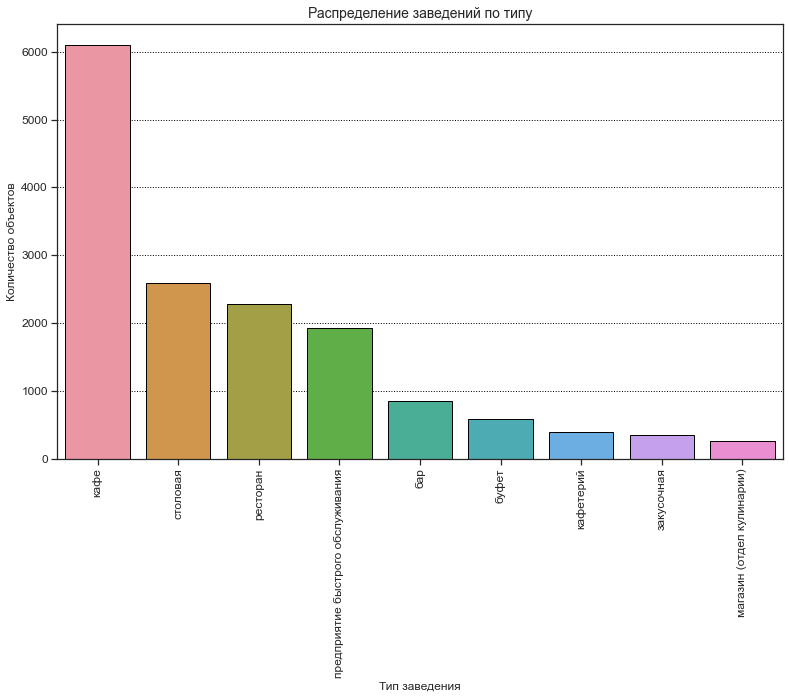

In [68]:
sns.set_theme(style='ticks',palette='cubehelix')
plt.figure(
    figsize=(13, 8)
)
ax = sns.countplot(x='object_type', data=rest_data,edgecolor='black', order = rest_data['object_type'].value_counts().index
                  ).set_title('Распределение заведений по типу',fontsize=14)
plt.xticks(rotation=90, horizontalalignment="center",fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Тип заведения',fontsize=12)
plt.ylabel('Количество объектов',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':')
plt.show()

График, построенный с помощью seaborn нагляднее передает разницу в значениях.

Мы видим, что самым распространенным типом объектов общественного питания является кафе. Количество таких заведений немного превышает 6000 и минимум в 2 раза больше, чем объектов любого другого типа. Не большая разница в количестве у столовых, ресторанов и предприятий быстрого обслуживания с числом заведений примерно от 2600 до 1900. Среди оставшихся типов самым многочисленным представителем является бар.

<a id="chain"></a>
### Соотношение сетевых и единичных объектов

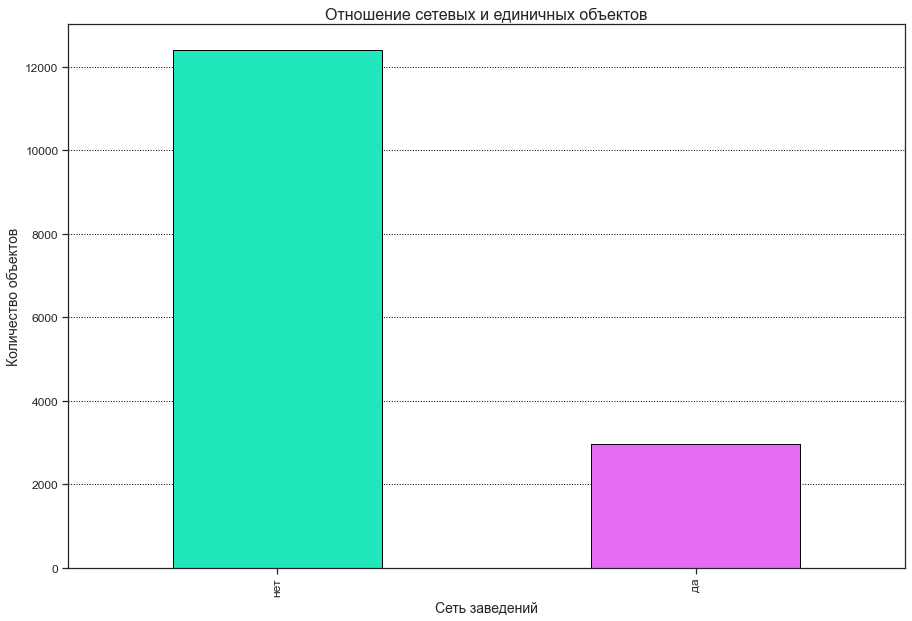

In [13]:
rest_data['chain'].value_counts().plot(kind='bar',color=['#20e7bc','#e66bf4'],edgecolor = 'black',
                                      figsize=(15,10))
plt.grid(axis='y',color='black', linestyle=':')
plt.xlabel('Сеть заведений', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.title('Отношение сетевых и единичных объектов', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#(0,250/250,154/250)

Гистограмма показывает, что количество объектов общественного питания, которые относятся к классу сетевых около 3-х тысяч, в то время, как одиночных чуть более 12-ти тысяч, что примерно в 4 раза больше.

<div class="alert alert-success">
<b>✅ Комментарий ревьюера:</b> 

В данном пункте так же все хорошо, тип графика подобран корректно. Так же тут подойдет пайплот, как вариант. С выводом согласен.
</div>

Теперь выделим тип объекта общественного питания для которого преобладает сетевой формат.

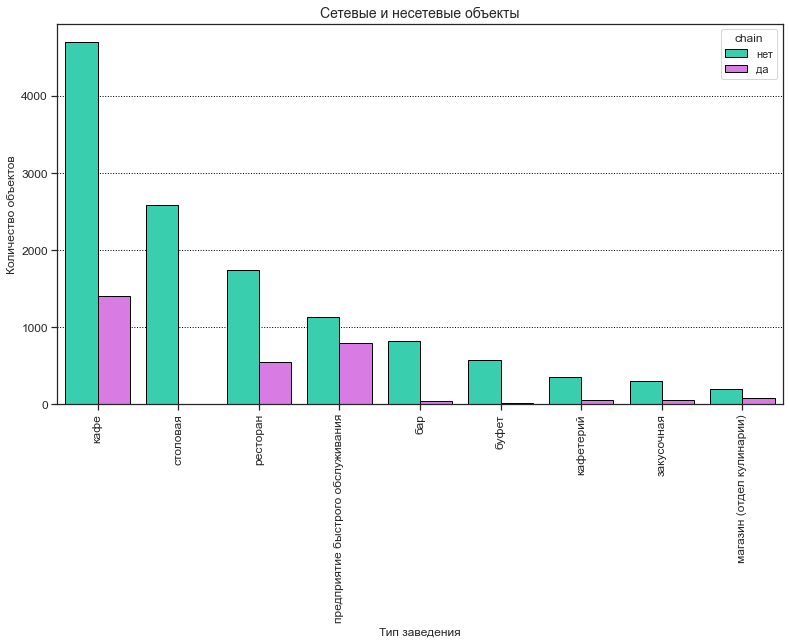

In [14]:
sns.set_theme(style='ticks')
plt.figure(
    figsize=(13, 7)
)
ax = sns.countplot(x='object_type', data=rest_data,edgecolor='black', order = rest_data['object_type'].value_counts().index
                  ,hue='chain',palette=['#20e7bc','#e66bf4']).set_title('Сетевые и несетевые объекты',fontsize=14)
plt.xticks(rotation=90
, horizontalalignment="center",fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Тип заведения',fontsize=12)
plt.ylabel('Количество объектов',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':')
plt.show()

Также можно изобразить данный график в виде гистограммы с накоплением

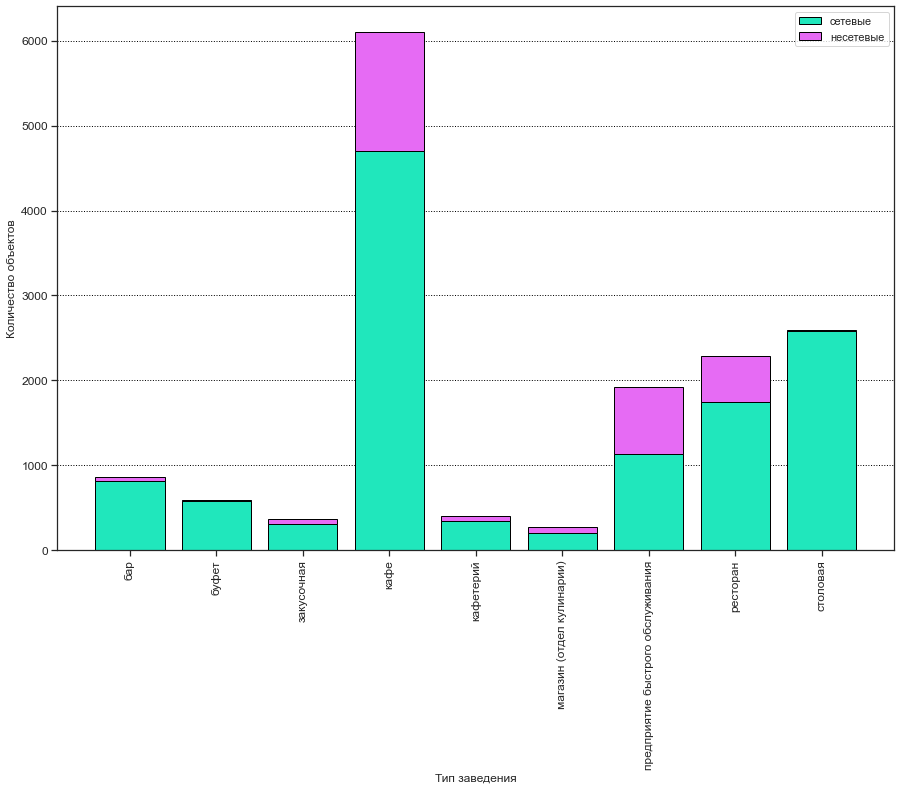

In [70]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
x = rest_data.sort_values(by='object_type')['object_type'].value_counts(sort=False).sort_index(ascending=True).index
chain = rest_data.query('chain == "да"')['object_type'].value_counts(sort=False).sort_index(ascending=True)
notchain = rest_data.query('chain == "нет"')['object_type'].value_counts(sort=False).sort_index(ascending=True)
plt.bar(x, notchain, color='#20e7bc',edgecolor = 'black')
plt.bar(x, chain,bottom=notchain, color='#e66bf4',edgecolor = 'black')
plt.xticks(rotation=90, horizontalalignment="center",fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Тип заведения',fontsize=12)
plt.ylabel('Количество объектов',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':')
plt.legend(["сетевые", "несетевые"])
plt.show()

Из графиков видно, что наибольшая доля объектов являются сетевыми в нише предприятий быстрого обслуживания.

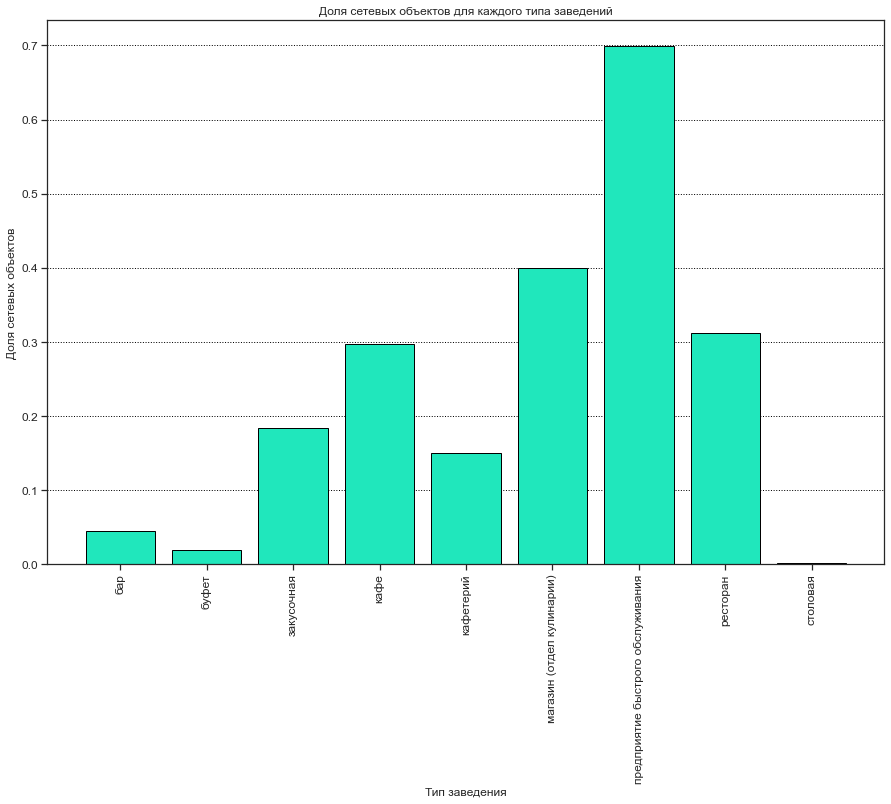

In [71]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
x = rest_data.sort_values(by='object_type')['object_type'].value_counts(sort=False).sort_index(ascending=True).index
chain = rest_data.query('chain == "да"')['object_type'].value_counts(sort=False).sort_index(ascending=True)
notchain = rest_data.query('chain == "нет"')['object_type'].value_counts(sort=False).sort_index(ascending=True)
plt.bar(x, chain/notchain, color='#20e7bc',edgecolor = 'black')
plt.xticks(rotation=90, horizontalalignment="center",fontsize=12)
plt.yticks(fontsize=12)
plt.title('Доля сетевых объектов для каждого типа заведений')
plt.xlabel('Тип заведения',fontsize=12)
plt.ylabel('Доля сетевых объектов',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':')
plt.show()

Проверим какой тип сетевых заведений наиболее распространен: большое количество посадочных мест при малом количестве объектов или малое количество посадочных мест при большой численности объектов. Сгруппируем таблицу по названию сети и подсчитаем количество объектов в ней, при этом количество посадочных мест будет расчитано медианное.

In [17]:
chain_objects = rest_data.query('chain == "да"').groupby('object_name').agg({'id':'count', 'number':'median'}
                                                                           ).sort_values(by='id',ascending=False)

C:\Users\1\AppData\Local\Temp\ipykernel_9004\3610929060.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(chain_objects['number'],chain_objects['id'],'ro', color='blue', alpha = 0.3)


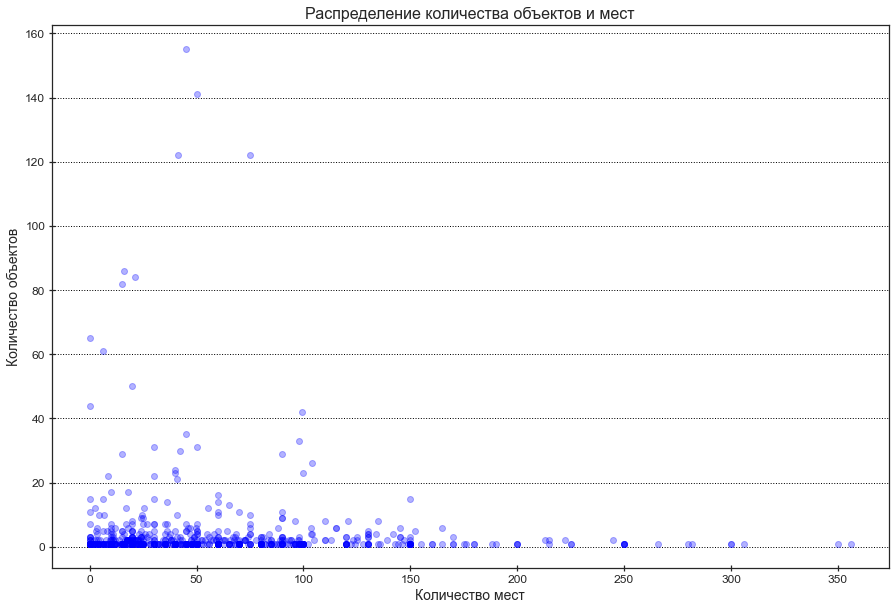

In [78]:
plt.figure(figsize=(15,10))
plt.plot(chain_objects['number'],chain_objects['id'],'ro', color='blue', alpha = 0.3)
plt.grid(axis='y',color='black', linestyle=':')
plt.xlabel('Количество мест', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.title('Распределение количества объектов и мест', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction = 'inout')
plt.show()

Видим, что заведений с количеством посадочных мест более 150 крайне мало, построим график без них.

C:\Users\1\AppData\Local\Temp\ipykernel_9004\301576820.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(chain_objects.query('number < 150')['number'],


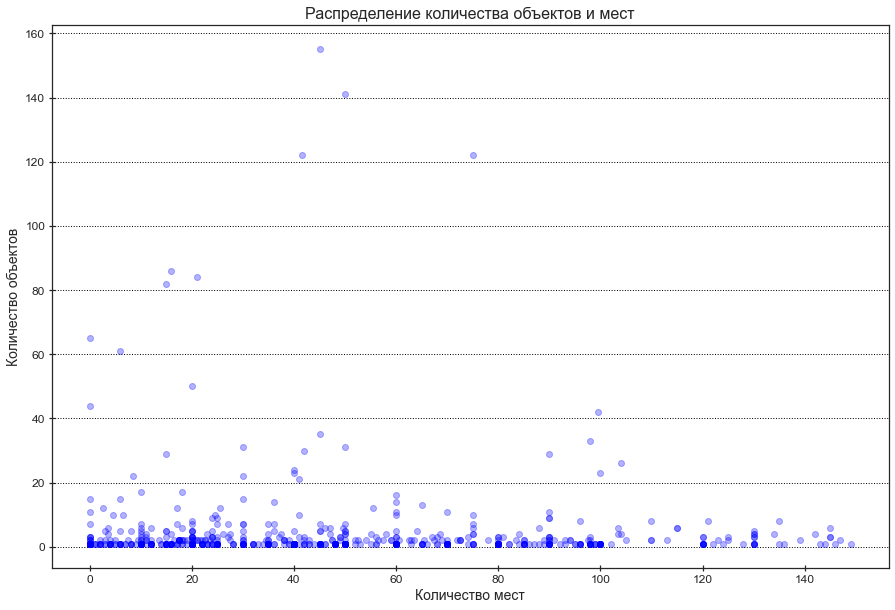

In [80]:
plt.figure(figsize=(15,10))
plt.plot(chain_objects.query('number < 150')['number'],
         chain_objects.query('number < 150')['id'],'ro', color='blue', alpha = 0.3)
plt.grid(axis='y',color='black', linestyle=':')
plt.xlabel('Количество мест', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.title('Распределение количества объектов и мест', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction = 'inout')
plt.show()

Большинство сетей имеют небольшое количество посадочных мест и небольшое количество объектов. Проверим объекты с числом заведений меньше 5.

In [20]:
chain_objects[chain_objects['id'] <= 5].head(50).rename(columns={'id':'amount', 'number':'seats'})

,amount,seats
object_name,,
SUBWAY,5,30.0
Шантимель,5,20.0
Ташир пицца,5,6.0
Предприятие быстрого обслуживания «Бургер Кинг»,5,24.0
Две палочки,5,130.0
Кулинарная лавка братьев Караваевых Братья Караваевы,5,45.0
Ливан-хаус,5,20.0
Суши WOK,5,3.0
MosKalyan,5,40.0


Видим заведение с названием SUBWAY, число точек питания которого явно больше 5 в Москве. Выведем теперь таблицу самых многочисленных сетевых объектов питания.

In [21]:
chain_objects.head(50).rename(columns={'id':'amount', 'number':'seats'})

,amount,seats
object_name,,
KFC,155,45.0
Шоколадница,141,50.0
Макдоналдс,122,75.0
Бургер Кинг,122,41.5
Домино'с Пицца,86,16.0
Теремок,84,21.0
Крошка Картошка,82,15.0
Милти,65,0.0
Суши Wok,61,6.0


Видим большое количество неявных дубликатов, которые искажают график и сдвигают его в область малого количества заведений. Установим фильтр на 1 заведение в сети.

In [22]:
chain_objects[chain_objects['id'] <= 1].head(50).rename(columns={'id':'amount', 'number':'seats'})

,amount,seats
object_name,,
Пицца Pomodoro и Суши Дзен,1,10.0
Чешская пивная ПИЛЗНЕР,1,80.0
Урюк Вавилова,1,99.0
Чешская пивная «Козловица»,1,306.0
Пицца ПИПОНИ,1,4.0
Чешская пивная «Пилзнер»,1,149.0
Урожай,1,40.0
Пицца «Паоло»,1,0.0
Чайхона №1 Бутово,1,150.0


В датасете очень много неявных дубликатов: транслитерация, разные регистры, дописаны улицы к названиям и т.д. Все эти значения должны входить в одну сеть, тогда на графике исчезнет область с малым количеством объектов для сети.

Делаем вывод, что сетевые заведения представлены большим количеством объектов с небольшим числом посадочных мест.

<a id="seats"></a>
### Среднее число посадочных мест

Определим среднее число посадочных мест для каждого типа объектов питания

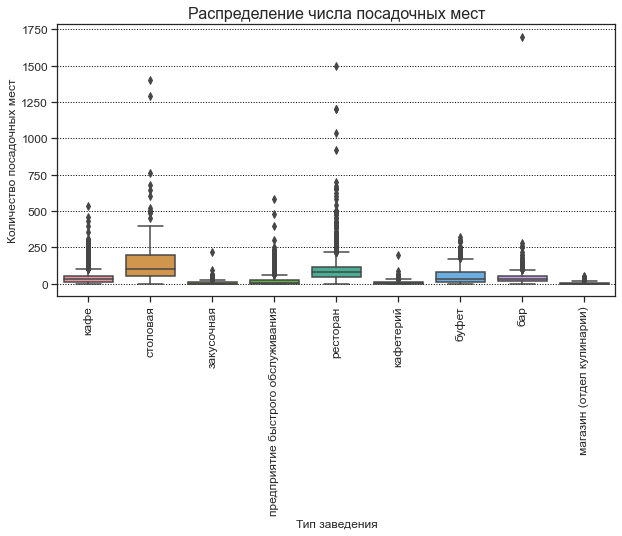

In [23]:
sns.set_theme(style='ticks',palette="cubehelix")
plt.figure(
    figsize=(10, 5)
)
sns.boxplot(x='object_type', y='number', data=rest_data)
plt.xticks(rotation=90, horizontalalignment="center",fontsize=12)
plt.yticks(fontsize=12)
plt.title('Распределение числа посадочных мест', fontsize =16)
plt.xlabel('Тип заведения',fontsize=12)
plt.ylabel('Количество посадочных мест',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':')
plt.show()
plt.show()

График типа ящик с усами указывает на то, что больше всего посадочных мест предоставляют столовые. На графике видно большое количество выбросов. Более информативным будет изучение графика с медианным значением числа мест для посетителей.

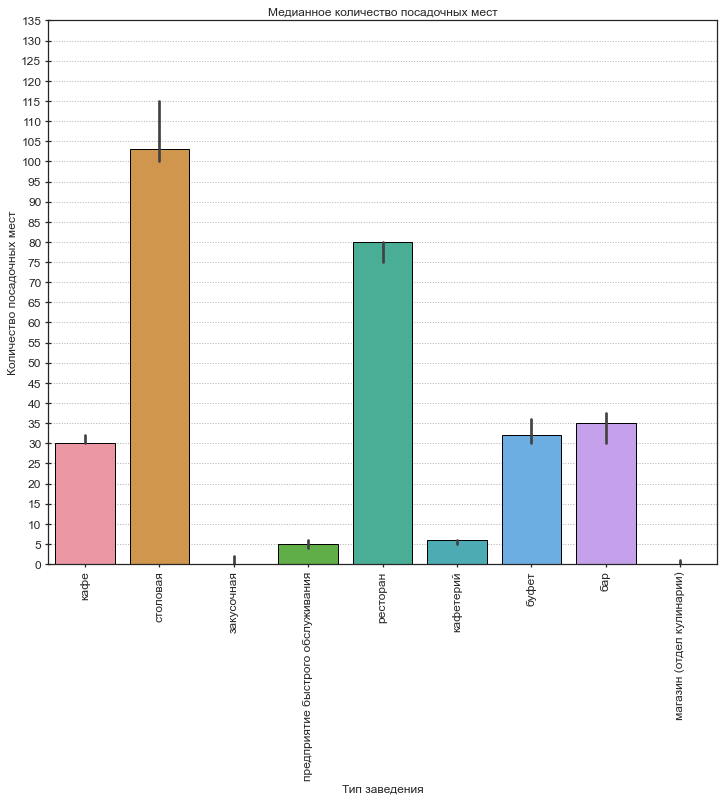

In [83]:
from numpy import median
plt.figure(
    figsize=(12, 10)
)
sns.barplot(x='object_type', y='number', data=rest_data,edgecolor='black',estimator=median)
plt.xticks(rotation=90, horizontalalignment="center",fontsize=12)
plt.yticks(range(0,140,5),fontsize=12)
plt.title('Медианное количество посадочных мест')
plt.xlabel('Тип заведения',fontsize=12)
plt.ylabel('Количество посадочных мест',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':', alpha = 0.3)
plt.tick_params(direction = 'inout')
plt.show()
plt.show()

Медианное значение количества посадочых мест для столовой наибольшее и составляет около 103. Далее находятся рейстораны с числом около 80 мест. У баров, буфетов и кафе по 35, 32 и 30 мест соответственно.

Далее количество посадочных мест резко уменьшается и составляет около 5 для предприятий быстрого обслуживания, около 6 у кафетерия. У закусочных и отделов кулинарии 0 посадочных мест, что связано со спецификой заведений (продажа с собой).

<a id="street"></a>
### Исследование местоположения

Напишем функцию для выделения названия улицы из адреса

In [25]:
def street_name(row):
    str = row.split()
    for x in range(len(str)):
        print(str[x])
        if 'дом' in str[x] or str[x] in range(0,9):
            return ' '.join(row.split()[2:x])[:-1]

In [26]:
rest_data['street_name'] = rest_data['address'].apply(street_name)

город
Москва,
улица
Егора
Абакумова,
дом
город
Москва,
улица
Талалихина,
дом
город
Москва,
Абельмановская
улица,
дом
город
Москва,
Абрамцевская
улица,
дом
город
Москва,
Абрамцевская
улица,
дом
город
Москва,
Абрамцевская
улица,
дом
город
Москва,
переулок
Сивцев
Вражек,
дом
город
Москва,
Авиамоторная
улица,
дом
город
Москва,
Авиамоторная
улица,
дом
город
Москва,
Авиамоторная
улица,
дом
город
Москва,
Авиамоторная
улица,
дом
город
Москва,
Авиамоторная
улица,
дом
город
Москва,
Авиамоторная
улица,
дом
город
Москва,
улица
Авиаторов,
дом
город
Москва,
улица
Авиаторов,
дом
город
Москва,
улица
Авиаторов,
дом
город
Москва,
Азовская
улица,
дом
город
Москва,
Азовская
улица,
дом
город
Москва,
Большая
Академическая
улица,
дом
город
Москва,
Филипповский
переулок,
дом
город
Москва,
Алтайская
улица,
дом
город
Москва,
Алтуфьевское
шоссе,
дом
город
Москва,
Алтуфьевское
шоссе,
дом
город
Москва,
Алтуфьевское
шоссе,
дом
город
Москва,
Алтуфьевское
шоссе,
дом
город
Москва,
Алтуфьевское
шоссе,
дом
город
Москва,

In [27]:
rest_data.head()

,id,object_name,chain,object_type,address,number,street_name
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Теперь сгруппируем данные по улице и выведем топ-10 улиц с наибольшим количеством объектов питания

In [28]:
top = rest_data.groupby('street_name').agg({'id':'count'}).sort_values(by='id',ascending=False).head(10)
top

,id
street_name,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,170
Пресненская набережная,167
Варшавское шоссе,155
Ленинский проспект,147
проспект Вернадского,131
Кутузовский проспект,114
Каширское шоссе,103


Построим график

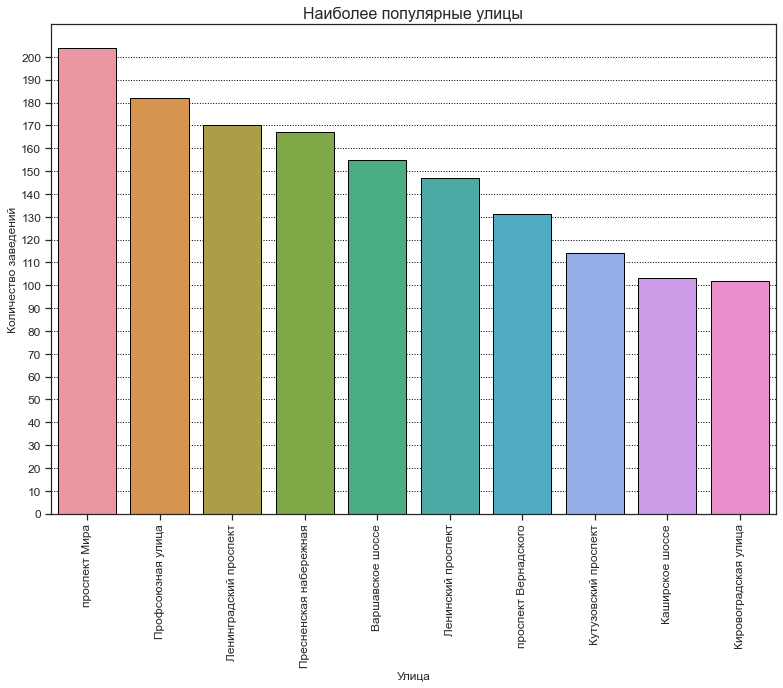

In [29]:
plt.figure(
    figsize=(13, 9)
)
sns.barplot(x=top.index, y='id', data=top,edgecolor='black')
plt.xticks(rotation=90, horizontalalignment="center",fontsize=12)
plt.yticks(range(0,210,10),fontsize=12)
plt.title('Наиболее популярные улицы', fontsize=16)
plt.xlabel('Улица',fontsize=12)
plt.ylabel('Количество заведений',fontsize=12)
plt.grid(axis='y',color='black',linestyle=':')
plt.show()
plt.show()

Загрузим из внешнего источника таблицу с названиями улиц города Москва и соответствующих им районам города.

In [30]:
from io import BytesIO
import requests
spreadsheet_id = '1jxAWKW5I1uwMeMN21AYdFncKIfruyXcVVALlfIqNN7k'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow = pd.read_csv(BytesIO(r.content))
moscow

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Теперь отфильтруем таблицу с районами по названию самых популярных улиц.

In [31]:
pd.set_option('display.max_colwidth', 400)
top10_msc = moscow.query('streetname in @top.index')

In [32]:
top10_msc

,streetname,areaid,okrug,area
72,Пресненская набережная,17,ЦАО,Пресненский район
1208,Кутузовский проспект,38,ЗАО,Район Дорогомилово
1280,Кутузовский проспект,49,ЗАО,Район Фили-Давыдково
1501,проспект Вернадского,44,ЗАО,Район Проспект Вернадского
1504,Ленинский проспект,44,ЗАО,Район Проспект Вернадского
1510,проспект Вернадского,45,ЗАО,Район Раменки
1598,проспект Вернадского,47,ЗАО,Район Тропарево-Никулино
1602,Ленинский проспект,47,ЗАО,Район Тропарево-Никулино
1857,Ленинградский проспект,54,САО,Район Аэропорт
1896,Ленинградский проспект,55,САО,Район Беговой


Сгруппируем таблицу с улицами на которых расположен только 1 объект общественного питания.

In [33]:
one_object = rest_data.groupby('street_name').agg({'id':'count'}).sort_values(by='id').query('id == 1')

In [34]:
one_object

,id
street_name,
Рижский проезд,1
Песчаный переулок,1
Петроверигский переулок,1
Петровско-Разумовская аллея,1
Печорская улица,1
...,...
3-я Подрезковская улица,1
6-й Лучевой просек,1
80-й километр Московской Кольцевой Автодороги,1


Определим в каких районах расположены эти улицы. Для этого отфильтруем таблицу с районами по названиям улиц.

In [35]:
one_object_msc = moscow.query('streetname in @one_object.index')
one_object_msc

,streetname,areaid,okrug,area
16,улица Анатолия Живова,17,ЦАО,Пресненский район
34,Средний Кондратьевский переулок,17,ЦАО,Пресненский район
37,Малый Конюшковский переулок,17,ЦАО,Пресненский район
39,переулок Красина,17,ЦАО,Пресненский район
43,Красногвардейский бульвар,17,ЦАО,Пресненский район
...,...,...,...,...
4339,Нижний Кисельный переулок,16,ЦАО,Мещанский район
4346,Малая Переяславская улица,16,ЦАО,Мещанский район
4355,Садовая-Сухаревская улица,16,ЦАО,Мещанский район
4363,улица Советской Армии,16,ЦАО,Мещанский район


Объединим таблицы с информацией об улицах и районах.

In [36]:
msc_districts = pd.concat([top10_msc,one_object_msc])

In [37]:
msc_districts

,streetname,areaid,okrug,area
72,Пресненская набережная,17,ЦАО,Пресненский район
1208,Кутузовский проспект,38,ЗАО,Район Дорогомилово
1280,Кутузовский проспект,49,ЗАО,Район Фили-Давыдково
1501,проспект Вернадского,44,ЗАО,Район Проспект Вернадского
1504,Ленинский проспект,44,ЗАО,Район Проспект Вернадского
...,...,...,...,...
4339,Нижний Кисельный переулок,16,ЦАО,Мещанский район
4346,Малая Переяславская улица,16,ЦАО,Мещанский район
4355,Садовая-Сухаревская улица,16,ЦАО,Мещанский район
4363,улица Советской Армии,16,ЦАО,Мещанский район


Сгруппируем таблицу по районам и посчитаем количество улиц в каждом районе.

In [38]:
msc_districts.groupby('area').agg({'streetname':'count'}).sort_values(by='streetname', ascending=False).head(15).rename(columns={'streetname':'number_of_streets'})

,number_of_streets
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Пресненский район,20
Тверской район,20
Район Марьина роща,18
Район Арбат,17
Мещанский район,17
Район Сокольники,15


Пресненский район, район Марьина Роща, Мещанский район присутствуют в обоих спиках и являются районами с улицами, на которых присутствует большое количоство заведений общественного питания, а также большое количество улиц с одним заведением.

<a id="conclusions"></a>
## Выводы

* В датасете присутствует большое количество неявных дубликатов. Это связано с отсутствием единого образца названия заведения при внесении в базу. При анализе сетевых заведений возникает проблема с подсчетом количества точек одной франшизы и определением средних характеристик, т.к. одно и то же заведение проходит по несколько раз с разным именем.

* В ходе анализа были определены 10 улиц Москвы с самым большим количеством объектов общественного питания. Такая популярность может быть связана с повышенным траффиком на этих улицах, наличием большого количества культурных, инфраструктурных и развлекательных объектов.

* Наиболее популярным типом объектов общественного питания является "Кафе". Анализ среднего числа посадочных мест показывает, что 30-40 посадочных мест являются довольно распространненым и подходит также для заведений сетевого формата. С точки зрения перспектив развития сети наиболее выгодным форматом является предприятие быстрого обслуживания с долей сетевых заведений в 70 %, за ним следуют кафе и рестораны с долей сетевых заведений около 30 %.
    
    Роботизированное кафе необходимо разместить в Пресненском, район Марьина Роща или Мещанском районах. В данных районах расположено большое количество улиц, где нет высокой конкуренции. Количество посадочных мест должно быть от 30 до 35, что также будет выгодно при сетевом масштабировании.

Презентация: [https://disk.yandex.ru/i/jJEx439NVzXH7Q](https://disk.yandex.ru/i/jJEx439NVzXH7Q)